# Modeling features of the C. elegans life cycle

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [201]:
from matplotlib import cm
colors = [cm.hsv(i) for i in np.linspace(0,1,8)]

## Modeling  C. elegans growth rate vs. temperature

In [202]:
T = np.array([16, 20, 25])
stages = ['egg (0)', 'L1 (1)', 'L2 (2)', 'L3 (3)', 'L4 (4)', 'Rep (5)', 'Rep-EB (6)', 'Rep-EM (7)', 'Rep-EE (8)']
growth_data = np.array([[0, 17, 36.5, 48, 60, 75, 90, 140, 180], 
                        [0, 11, 26, 34.5, 43.5, 56, 65, 96, 128], 
                        [0, 8.5, 18, 25.5, 31, 39, 47, 62, 88]])

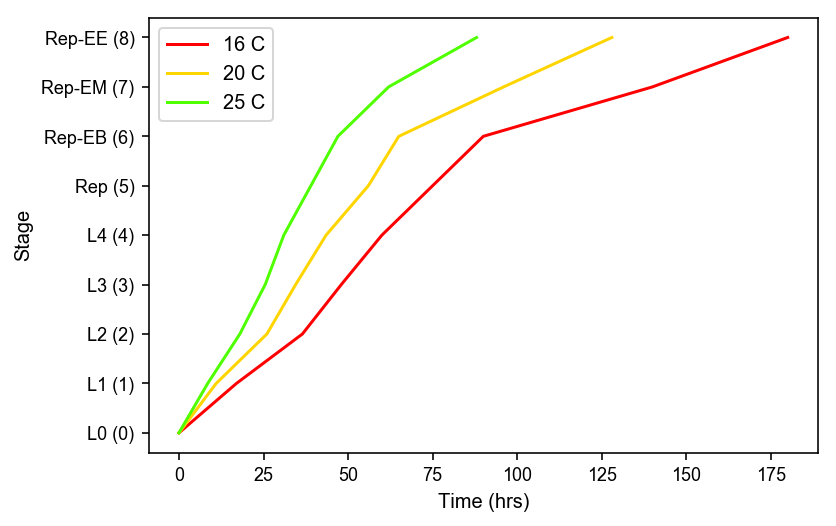

In [203]:
fig, ax = plt.subplots()
for t, data, c in zip(T, growth_data, colors):
    ax.plot(data, range(len(data)), label=str(t) + ' C', color=c)
ax.set_yticks(range(len(data)))
ax.set_yticklabels(stages)
ax.set_ylabel('Stage')
ax.set_xlabel('Time (hrs)')
ax.legend(loc='upper left')

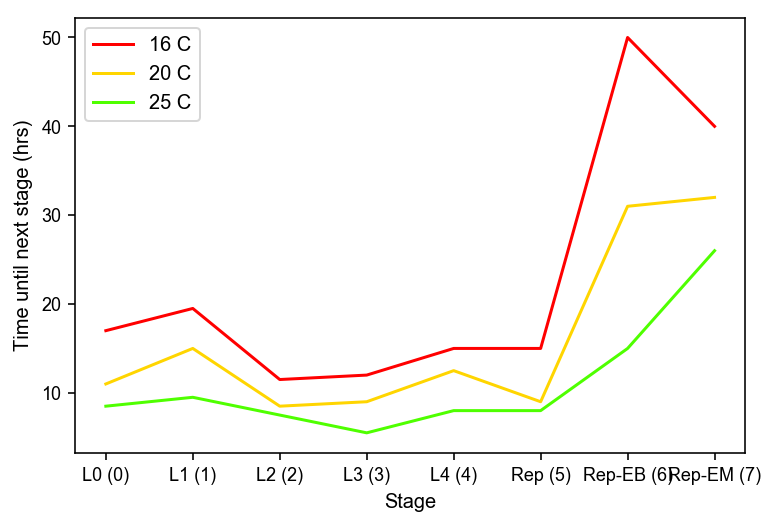

In [204]:
fig, ax = plt.subplots()
for t, data, c in zip(T, growth_data, colors):
    diffs = data[1:] - data[:-1]
    ax.plot(range(len(diffs)), diffs, label=str(t) + ' C', c=c)
ax.set_xticks(range(len(diffs)))
ax.set_xticklabels(stages)
ax.set_xlabel('Stage')
ax.set_ylabel('Time until next stage (hrs)')
ax.legend(loc='upper left')

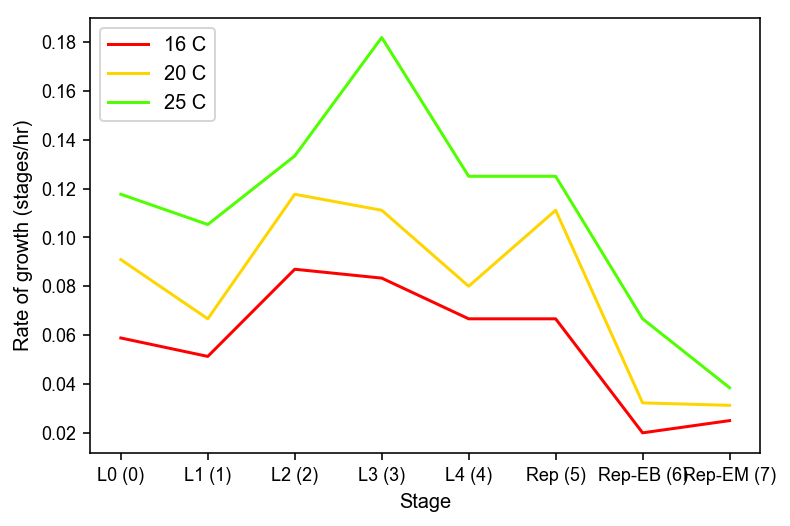

In [205]:
fig, ax = plt.subplots()
for t, data, c in zip(T, growth_data, colors):
    diffs = data[1:] - data[:-1]
    ax.plot(range(len(diffs)), 1/diffs, label=str(t) + ' C', color=c)
ax.set_xticks(range(len(diffs)))
ax.set_xticklabels(stages)
ax.set_xlabel('Stage')
ax.set_ylabel('Rate of growth (stages/hr)')
ax.legend(loc='upper left')

Text(0, 0.5, 'Time (hrs)')

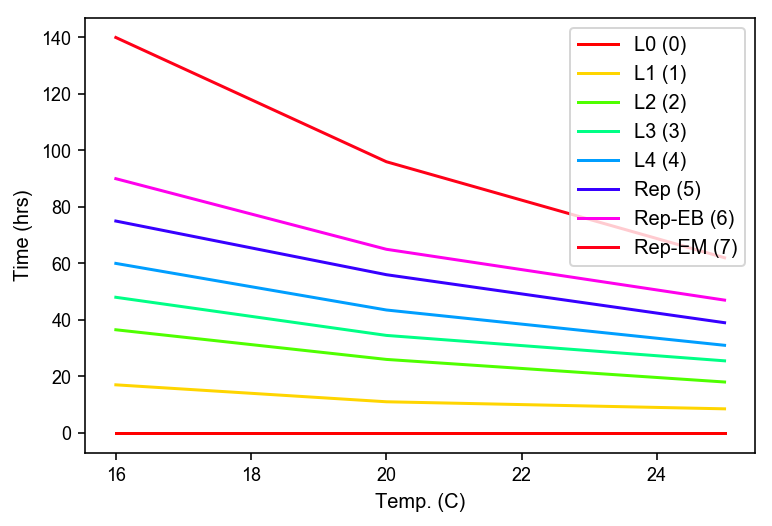

In [206]:
fig, ax = plt.subplots()
for i, (stage, c) in enumerate(zip(stages, colors)):
    ax.plot(T, growth_data[:,i], label=stage, color=c)
ax.legend(loc='upper right')
ax.set_xlabel('Temp. (C)')
ax.set_ylabel('Time (hrs)')

Text(0, 0.5, 'Time until next stage (hrs)')

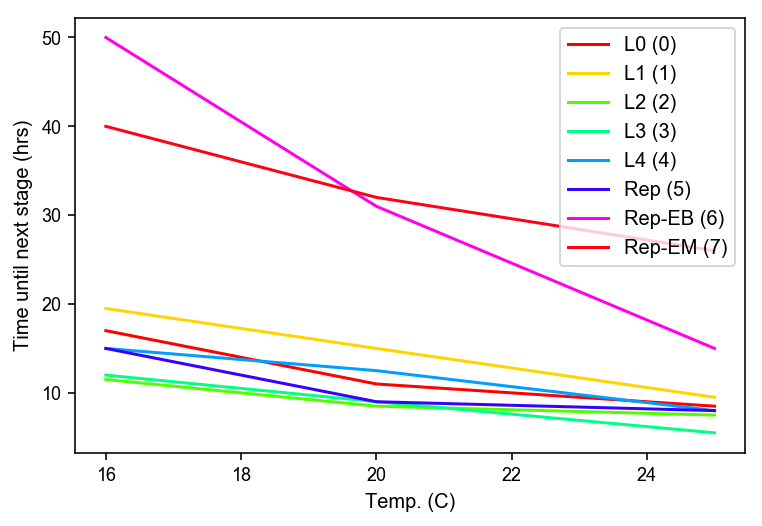

In [207]:
fig, ax = plt.subplots()
for i, (stage, c) in enumerate(zip(stages[:-1], colors)):
    diff = growth_data[:,i+1] - growth_data[:,i]
    ax.plot(T, diff, label=stage, color=c)
ax.legend(loc='upper right')
ax.set_xlabel('Temp. (C)')
ax.set_ylabel('Time until next stage (hrs)')

In [208]:
growth_data[:,3] - growth_data[:,2]

array([11.5,  8.5,  7.5])

In [209]:
def hours_until_next_stage(stage, T):
    return 1. / (0.005741032786885247*T -0.04751600000000002)

def growth_rate(stage, T):
    return 1. / hours_until_next_stage(stage, T)

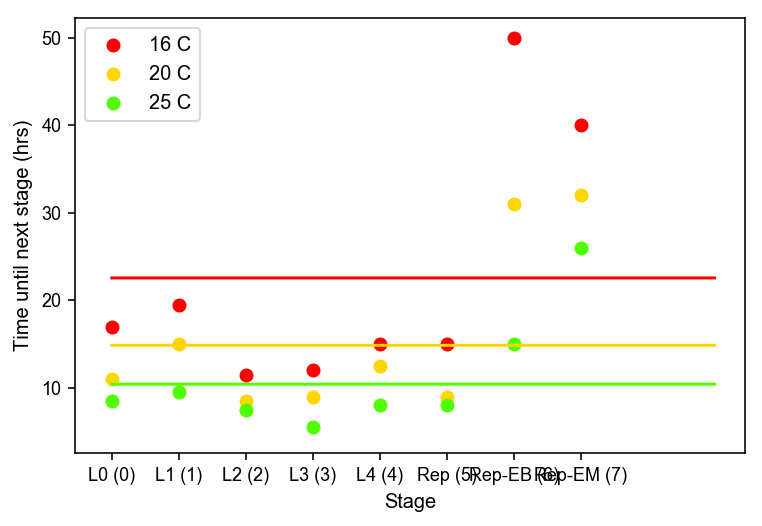

In [210]:
fig, ax = plt.subplots()
for t, data, c in zip(T, growth_data, colors):
    diffs = data[1:] - data[:-1]
    ax.scatter(range(len(diffs)), diffs, label=str(t) + ' C', color=c)
    S_c = np.arange(0, len(stages), .0001)
    ax.plot(S_c, [hours_until_next_stage(s, t) for s in S_c], color=c)
ax.set_xticks(range(len(diffs)))
ax.set_xticklabels(stages)
ax.set_xlabel('Stage')
ax.set_ylabel('Time until next stage (hrs)')
ax.legend(loc='upper left')

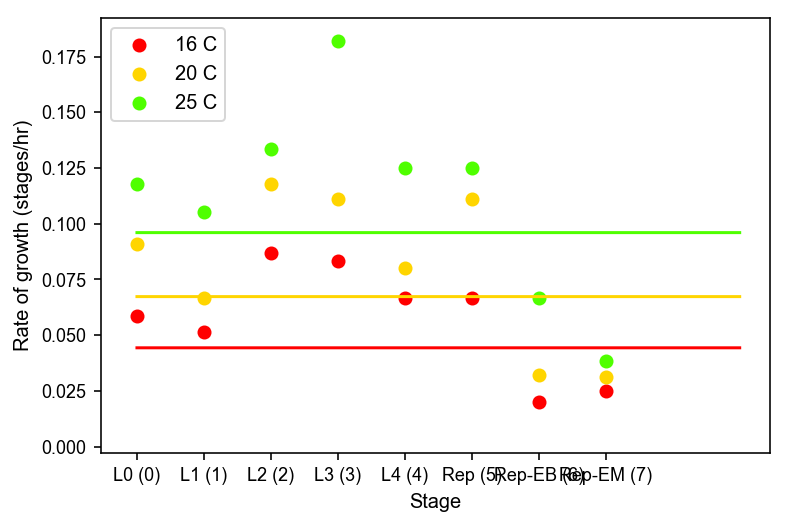

In [211]:
fig, ax = plt.subplots()
for t, data, c in zip(T, growth_data, colors):
    diffs = data[1:] - data[:-1]
    ax.scatter(range(len(diffs)), 1/diffs, label=str(t) + ' C', color=c)
    S_c = np.arange(0, len(stages), .0001)
    ax.plot(S_c, [growth_rate(s, t) for s in S_c], color=c)
ax.set_xticks(range(len(diffs)))
ax.set_xticklabels(stages)
ax.set_xlabel('Stage')
ax.set_ylabel('Rate of growth (stages/hr)')
ax.legend(loc='upper left')

Text(0, 0.5, 'Time until next stage (hrs)')

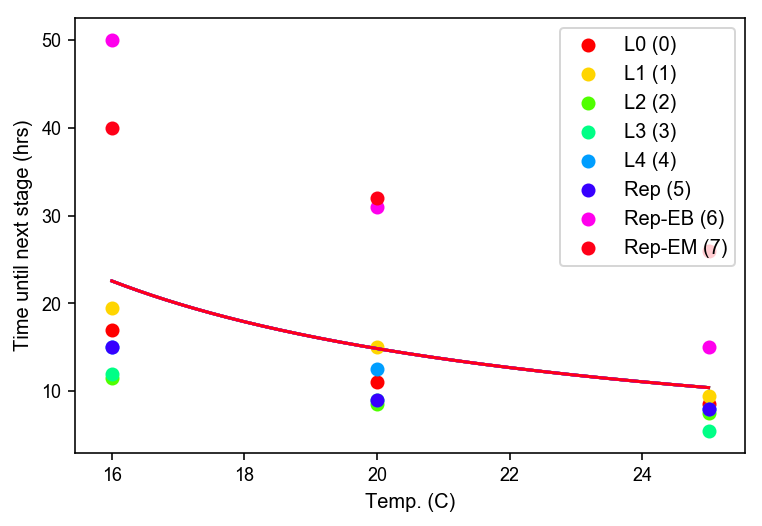

In [212]:
fig, ax = plt.subplots()
for i, (stage, c) in enumerate(zip(stages[:-1], colors)):
    diff = growth_data[:,i+1] - growth_data[:,i]
    ax.scatter(T, diff, label=stage, color=c)
    T_c = np.arange(np.min(T), np.max(T), .0001)
    ax.plot(T_c, [hours_until_next_stage(i, t) for t in T_c], color=c)
ax.legend(loc='upper right')
ax.set_xlabel('Temp. (C)')
ax.set_ylabel('Time until next stage (hrs)')

LinregressResult(slope=0.005741032786885247, intercept=-0.04751600000000002, rvalue=0.997046961908978, pvalue=0.04893691380377805, stderr=0.0004421840528896697)

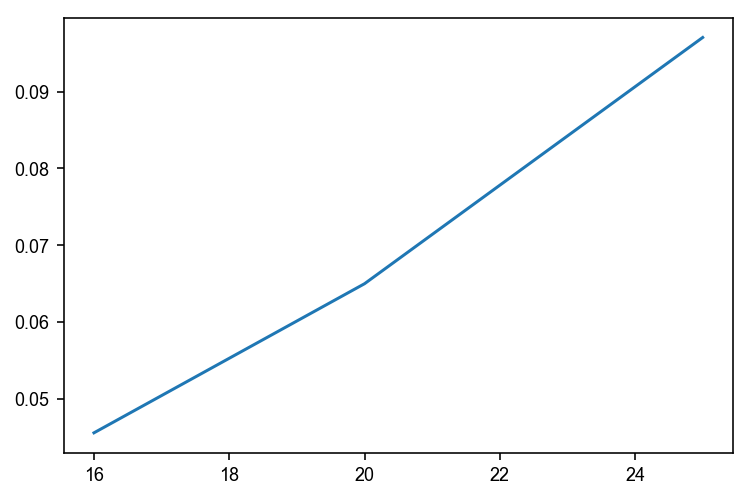

In [213]:
# Finiding function of T
slopes = [0.045617, 0.065007, 0.097031]

plt.plot(T, slopes)

from scipy.stats import linregress
linregress(T, slopes)

## Modeling C. elegans dauers probability vs. density and temperature

In [214]:
T = np.array([15, 20, 25, 27])
pher = np.array([0, 2, 8, 30])
dauers_data = np.array([[0, 0.20, 0.68, 0.90], 
                        [0, 0.05, 0.72, 0.92],
                        [0, 0.35, 0.80, 0.95],
                        [0, 0.95, 0.95, 0.97]])

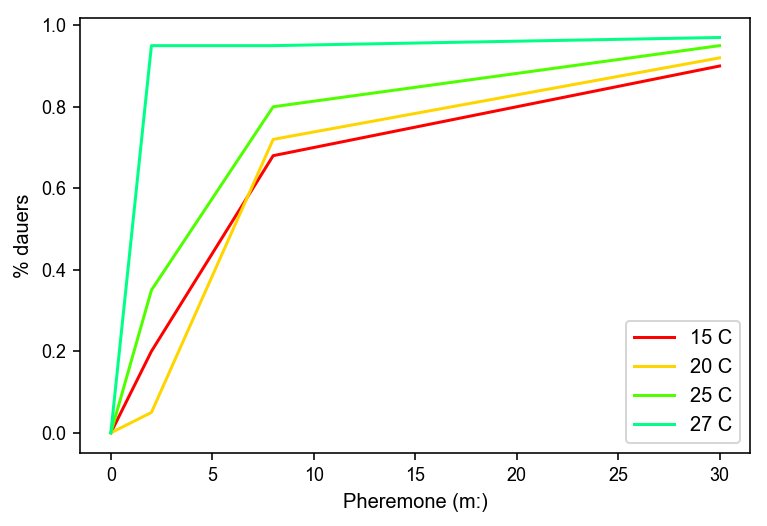

In [215]:
fig, ax = plt.subplots()
for t, data, c in zip(T, dauers_data, colors):
    ax.plot(pher, data, label=str(t) + ' C', color=c)
ax.set_xlabel('Pheremone (m:)')
ax.set_ylabel('% dauers')
ax.legend(loc='lower right')

In [216]:
def p_dauers(T, pher):
    return -1/(pher*(0.00012*(T - 16)**4 + 0.25) + 1) + 1 

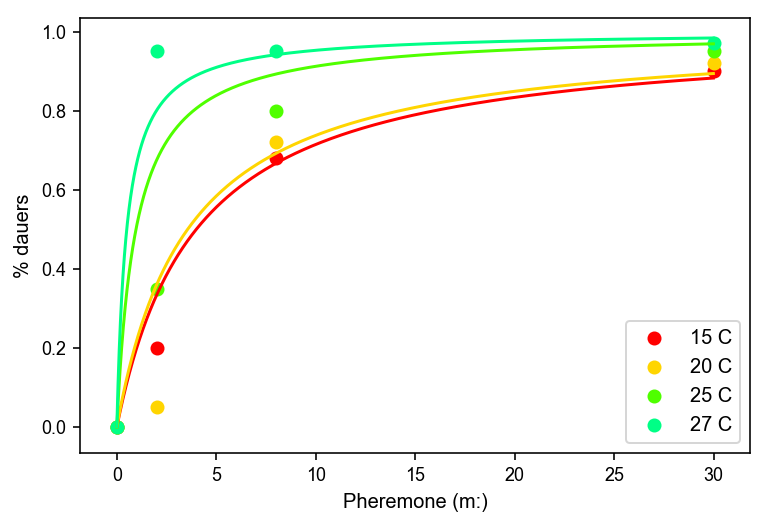

In [217]:
fig, ax = plt.subplots()
for t, data, c in zip(T, dauers_data, colors):
    ax.scatter(pher, data, label=str(t) + ' C', color=c)
    pher_c = np.arange(np.min(pher), np.max(pher), 0.01)
    ax.plot(pher_c, [p_dauers(t, p) for p in pher_c], color=c)
ax.set_xlabel('Pheremone (m:)')
ax.set_ylabel('% dauers')
ax.legend(loc='lower right')

## Modeling C. elegans birth rate & number of eggs vs. temperature

In [218]:
T = [16, 20, 25]
max_obs_rate = [5.4, 9.1, 8.1]
total_eggs = [275, 280, 170]

Text(0, 0.5, 'Total eggs laid (#)')

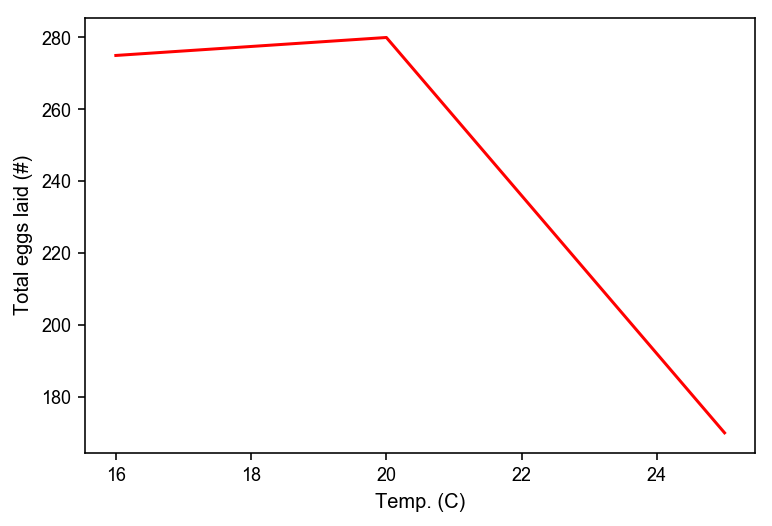

In [219]:
fig, ax = plt.subplots()
ax.plot(T, total_eggs, color=colors[0])
ax.set_xlabel('Temp. (C)')
ax.set_ylabel('Total eggs laid (#)')

Text(0, 0.5, 'Max. egg laying rate (#/hr)')

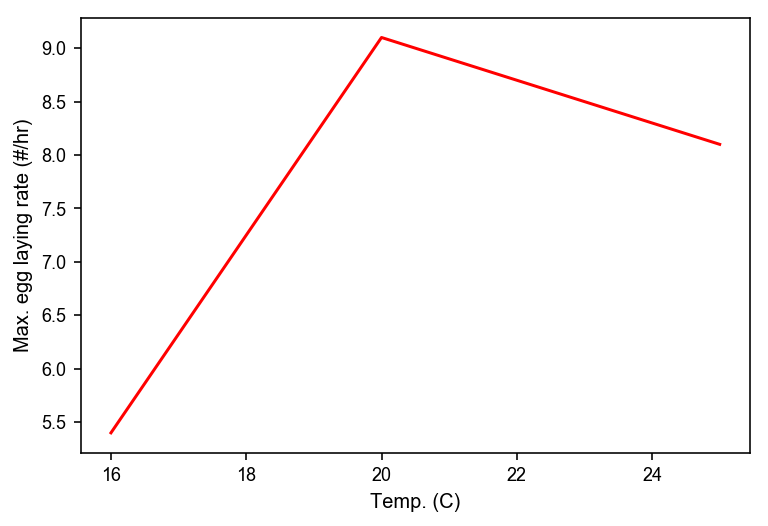

In [220]:
fig, ax = plt.subplots()
ax.plot(T, max_obs_rate, color=colors[0])
ax.set_xlabel('Temp. (C)')
ax.set_ylabel('Max. egg laying rate (#/hr)')

In [221]:
def n_eggs(T):
    return 280*np.exp(-(T - 17.0)**2/100.0)

def max_rate(T):
    return 9.0*np.exp(-(T - 22.0)**2/100.0)

# Note egg laying begins at stage 6, maxes at 7, and stops by 8
def egg_rate(stage, T):
    return max_rate(T)*np.exp(-(stage - 7.0)**2 / 2.0)

Text(0, 0.5, 'Total eggs laid (#)')

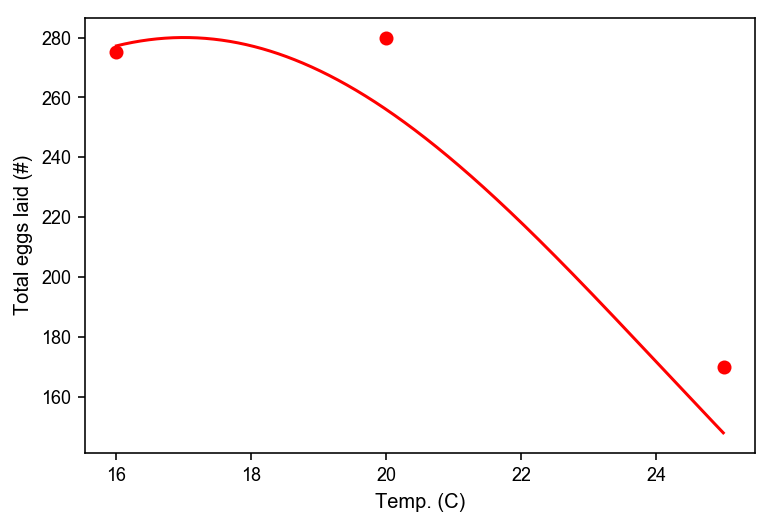

In [222]:
fig, ax = plt.subplots()
ax.scatter(T, total_eggs, color=colors[0])
T_c = np.arange(np.min(T), np.max(T), 0.01)
ax.plot(T_c, [n_eggs(t) for t in T_c], color=colors[0])
ax.set_xlabel('Temp. (C)')
ax.set_ylabel('Total eggs laid (#)')

Text(0, 0.5, 'Max. egg laying rate (#/hr)')

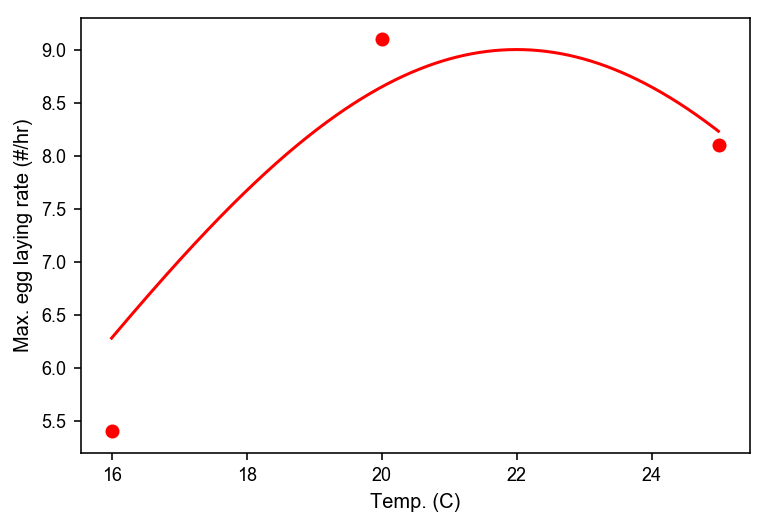

In [223]:
fig, ax = plt.subplots()
ax.scatter(T, max_obs_rate, color=colors[0])
T_c = np.arange(np.min(T), np.max(T), 0.01)
ax.plot(T_c, [max_rate(t) for t in T_c], color=colors[0])
ax.set_xlabel('Temp. (C)')
ax.set_ylabel('Max. egg laying rate (#/hr)')